In [1]:
# Import 

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import csv
import datetime
#from geopy import distance
#from config import gkey
import numpy as np
import time
#import gmaps
#import gmaps.datasets
#from googlemaps import Client as GoogleMaps
import requests
import calendar
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec


In [2]:
# find the file path of where the "all_2021_df.csv is saved on your particular local drive"

csv_path = "/Users/joelw/GitHub/Project_1_Repo/unclean_2021_data/all_2021_df.csv"
all_2021_df = pd.read_csv(csv_path,low_memory=False)
all_2021_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EF1237396C1D2DF4,electric_bike,2021-11-15 09:40:42,2021-11-15 09:48:22,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member
1,4CA89455176FD912,classic_bike,2021-11-23 16:57:30,2021-11-23 17:02:04,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member
2,3E632C5C54A1485C,classic_bike,2021-11-29 09:27:35,2021-11-29 09:51:22,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member
3,9ED25F0388AC6226,classic_bike,2021-11-09 17:47:01,2021-11-09 17:51:15,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member
4,3BF46E8C8FB64B36,classic_bike,2021-11-04 16:17:13,2021-11-04 16:21:01,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member


In [3]:
# Rename Columns
all_2021_df.rename(columns={"ride_id":"Ride ID", "rideable_type":"Bike Type", "started_at": "Start Date", "ended_at": "End Date", "start_station_name": "Start Station", "start_station_id":"Start Station ID","end_station_name":"End Station", "end_station_id":"End Station ID","start_lat": "Starting Lat", "start_lng": "Starting Lng", "end_lat": "Ending Lat", "end_lng":"Ending Lng","member_casual": "Member type"},inplace=True)

In [4]:
# Print renamed columns
all_2021_df.head()

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type
0,EF1237396C1D2DF4,electric_bike,2021-11-15 09:40:42,2021-11-15 09:48:22,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member
1,4CA89455176FD912,classic_bike,2021-11-23 16:57:30,2021-11-23 17:02:04,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member
2,3E632C5C54A1485C,classic_bike,2021-11-29 09:27:35,2021-11-29 09:51:22,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member
3,9ED25F0388AC6226,classic_bike,2021-11-09 17:47:01,2021-11-09 17:51:15,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member
4,3BF46E8C8FB64B36,classic_bike,2021-11-04 16:17:13,2021-11-04 16:21:01,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member


In [5]:
#drop null values
all_2021_df.dropna(how='any')

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type
0,EF1237396C1D2DF4,electric_bike,2021-11-15 09:40:42,2021-11-15 09:48:22,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member
1,4CA89455176FD912,classic_bike,2021-11-23 16:57:30,2021-11-23 17:02:04,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member
2,3E632C5C54A1485C,classic_bike,2021-11-29 09:27:35,2021-11-29 09:51:22,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member
3,9ED25F0388AC6226,classic_bike,2021-11-09 17:47:01,2021-11-09 17:51:15,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member
4,3BF46E8C8FB64B36,classic_bike,2021-11-04 16:17:13,2021-11-04 16:21:01,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499757,8C999F60CA429723,classic_bike,2021-12-15 18:26:44,2021-12-15 18:34:25,14th & Belmont St NW,31119.0,14th & Rhode Island Ave NW,31203.0,38.921074,-77.031887,38.908600,-77.032300,casual
5499758,CA9B6486BDC1D25A,electric_bike,2021-12-15 00:45:55,2021-12-15 00:49:46,14th & Belmont St NW,31119.0,14th & Irving St NW,31124.0,38.920981,-77.031653,38.928552,-77.032224,casual
5499759,95957793A0807E8B,classic_bike,2021-12-06 14:17:45,2021-12-06 14:29:26,15th & P St NW,31201.0,14th & Irving St NW,31124.0,38.909801,-77.034427,38.928552,-77.032224,member
5499760,99DA9A8F72185C79,docked_bike,2021-12-29 14:59:01,2021-12-29 16:29:40,10th St & L'Enfant Plaza SW,31287.0,10th St & L'Enfant Plaza SW,31287.0,38.884323,-77.026010,38.884323,-77.026010,casual


In [6]:
#seperate date from time and populate day of week column
all_2021_df['Start Date']=pd.to_datetime(all_2021_df['Start Date'])
all_2021_df['End Date']=pd.to_datetime(all_2021_df['End Date'])
all_2021_df['Day of Week']=all_2021_df['Start Date'].dt.day_name()
all_2021_df['Year']=all_2021_df['Start Date'].dt.year
all_2021_df['Year']=pd.to_numeric(all_2021_df['Year'])
all_2021_df['Day Type'] = all_2021_df['Start Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
all_2021_df["Month"] = all_2021_df["Start Date"].dt.month
all_2021_df['Month'] = all_2021_df['Month'].apply(lambda x: calendar.month_abbr[x])
all_2021_df.head()


,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Day Type,Month
0,EF1237396C1D2DF4,electric_bike,2021-11-15 09:40:42,2021-11-15 09:48:22,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member,Monday,2021,Weekday,Nov
1,4CA89455176FD912,classic_bike,2021-11-23 16:57:30,2021-11-23 17:02:04,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member,Tuesday,2021,Weekday,Nov
2,3E632C5C54A1485C,classic_bike,2021-11-29 09:27:35,2021-11-29 09:51:22,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member,Monday,2021,Weekday,Nov
3,9ED25F0388AC6226,classic_bike,2021-11-09 17:47:01,2021-11-09 17:51:15,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Tuesday,2021,Weekday,Nov
4,3BF46E8C8FB64B36,classic_bike,2021-11-04 16:17:13,2021-11-04 16:21:01,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Thursday,2021,Weekday,Nov


In [7]:
all_2021_df['Day Type'] = all_2021_df['Start Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [8]:
# calculates the bike ride/rental duration by subtracting end time from start time

all_2021_df['Duration']= (all_2021_df['End Date'] - all_2021_df['Start Date']).dt.total_seconds()
all_2021_df['Duration']= all_2021_df[['Duration']].astype(int)
all_2021_df.sample(5)


,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Day Type,Month,Duration
5417488,7429FE0E1BBEFCCD,classic_bike,2021-12-06 08:26:46,2021-12-06 08:39:18,Massachusetts Ave & 6th St NE,31657.0,12th & L St NW,31251.0,38.892934,-76.998273,38.903819,-77.028400,member,Monday,2021,Weekday,Dec,752
4188683,86025A4BC536AD97,electric_bike,2021-06-28 16:32:09,2021-06-28 16:48:56,14th & Otis Pl NW,31131.0,NaN,NaN,38.934432,-77.032666,38.940000,-77.030000,casual,Monday,2021,Weekday,Jun,1007
5129413,BB9D1869D63BB591,classic_bike,2021-12-18 10:38:28,2021-12-18 10:42:16,6th St & Indiana Ave NW,31264.0,New Jersey Ave & F St NW,31655.0,38.894573,-77.019940,38.897108,-77.011616,member,Saturday,2021,Weekend,Dec,228
807799,42FEF24B544FA1D9,electric_bike,2021-08-01 13:45:37,2021-08-01 13:58:19,NaN,NaN,NaN,NaN,38.940000,-77.020000,38.960000,-77.040000,member,Sunday,2021,Weekend,Aug,762
4612077,3236939B2679FCED,classic_bike,2021-04-01 17:11:14,2021-04-01 17:27:34,4th & D St NW / Judiciary Square,31621.0,12th & U St NW,31268.0,38.895344,-77.016106,38.916787,-77.028139,casual,Thursday,2021,Weekday,Apr,980


In [9]:
# Convert "Start Date" and "End Date" columns to datetime
all_2021_df['Start Date'] = pd.to_datetime(all_2021_df['Start Date'])
all_2021_df['End Date'] = pd.to_datetime(all_2021_df['End Date'])

# Create new columns for time components
all_2021_df['Start Time'] = all_2021_df['Start Date'].dt.time
all_2021_df['End Time'] = all_2021_df['End Date'].dt.time

# Convert "Start Date" and "End Date" columns to date
all_2021_df['Start Date'] = all_2021_df['Start Date'].dt.date
all_2021_df['End Date'] = all_2021_df['End Date'].dt.date

# Convert "Start Date" and "End Date" columns back to datetime with combined date and time
all_2021_df['Start Date'] = pd.to_datetime(all_2021_df['Start Date'].astype(str) + ' ' + all_2021_df['Start Time'].astype(str))
all_2021_df['End Date'] = pd.to_datetime(all_2021_df['End Date'].astype(str) + ' ' + all_2021_df['End Time'].astype(str))

# Convert "Start Date" column to datetime
all_2021_df['Start Date'] = pd.to_datetime(all_2021_df['Start Date'])

# Extract day of the week and year
all_2021_df['Day of Week'] = all_2021_df['Start Date'].dt.day_name()
all_2021_df['Year'] = all_2021_df['Start Date'].dt.year
all_2021_df['Year'] = pd.to_numeric(all_2021_df['Year'])

# Display the updated DataFrame
all_2021_df.head()



,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Day Type,Month,Duration,Start Time,End Time
0,EF1237396C1D2DF4,electric_bike,2021-11-15 09:40:42,2021-11-15 09:48:22,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member,Monday,2021,Weekday,Nov,460,09:40:42,09:48:22
1,4CA89455176FD912,classic_bike,2021-11-23 16:57:30,2021-11-23 17:02:04,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member,Tuesday,2021,Weekday,Nov,274,16:57:30,17:02:04
2,3E632C5C54A1485C,classic_bike,2021-11-29 09:27:35,2021-11-29 09:51:22,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member,Monday,2021,Weekday,Nov,1427,09:27:35,09:51:22
3,9ED25F0388AC6226,classic_bike,2021-11-09 17:47:01,2021-11-09 17:51:15,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Tuesday,2021,Weekday,Nov,254,17:47:01,17:51:15
4,3BF46E8C8FB64B36,classic_bike,2021-11-04 16:17:13,2021-11-04 16:21:01,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Thursday,2021,Weekday,Nov,228,16:17:13,16:21:01


In [10]:
# Remove time from "Start Date" and "End Date" columns
all_2021_df['Start Date'] = all_2021_df['Start Date'].dt.date
all_2021_df['End Date'] = all_2021_df['End Date'].dt.date

# Display the updated DataFrame
all_2021_df.head()

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Day Type,Month,Duration,Start Time,End Time
0,EF1237396C1D2DF4,electric_bike,2021-11-15,2021-11-15,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member,Monday,2021,Weekday,Nov,460,09:40:42,09:48:22
1,4CA89455176FD912,classic_bike,2021-11-23,2021-11-23,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member,Tuesday,2021,Weekday,Nov,274,16:57:30,17:02:04
2,3E632C5C54A1485C,classic_bike,2021-11-29,2021-11-29,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member,Monday,2021,Weekday,Nov,1427,09:27:35,09:51:22
3,9ED25F0388AC6226,classic_bike,2021-11-09,2021-11-09,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Tuesday,2021,Weekday,Nov,254,17:47:01,17:51:15
4,3BF46E8C8FB64B36,classic_bike,2021-11-04,2021-11-04,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Thursday,2021,Weekday,Nov,228,16:17:13,16:21:01


In [11]:
# Get today's date
today = datetime.date.today()

# Convert "Start Time" and "End Time" to datetime
all_2021_df['Start Time'] = pd.to_datetime(today.strftime('%Y-%m-%d') + ' ' + all_2021_df['Start Time'].astype(str))
all_2021_df['End Time'] = pd.to_datetime(today.strftime('%Y-%m-%d') + ' ' + all_2021_df['End Time'].astype(str))

# Convert time to AM/PM format
all_2021_df['Start Time'] = all_2021_df['Start Time'].dt.strftime('%I:%M %p')
all_2021_df['End Time'] = all_2021_df['End Time'].dt.strftime('%I:%M %p')

# Display the updated DataFrame
all_2021_df.head()

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Day Type,Month,Duration,Start Time,End Time
0,EF1237396C1D2DF4,electric_bike,2021-11-15,2021-11-15,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member,Monday,2021,Weekday,Nov,460,09:40 AM,09:48 AM
1,4CA89455176FD912,classic_bike,2021-11-23,2021-11-23,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member,Tuesday,2021,Weekday,Nov,274,04:57 PM,05:02 PM
2,3E632C5C54A1485C,classic_bike,2021-11-29,2021-11-29,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member,Monday,2021,Weekday,Nov,1427,09:27 AM,09:51 AM
3,9ED25F0388AC6226,classic_bike,2021-11-09,2021-11-09,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Tuesday,2021,Weekday,Nov,254,05:47 PM,05:51 PM
4,3BF46E8C8FB64B36,classic_bike,2021-11-04,2021-11-04,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Thursday,2021,Weekday,Nov,228,04:17 PM,04:21 PM


In [12]:
all_2021_df.to_csv('all_2021_data.csv', index=False)

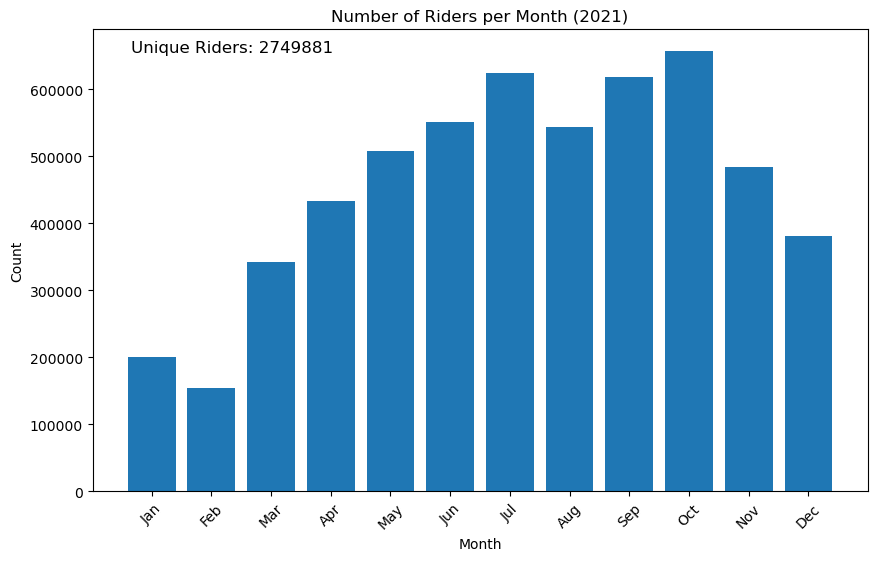

In [13]:
#import matplotlib.pyplot as plt
#import pandas as pd

# Convert 'Month' column to categorical data type with custom order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
all_2021_df['Month'] = pd.Categorical(all_2021_df['Month'], categories=month_order, ordered=True)

# Count the occurrences of each month
monthly_counts = all_2021_df['Month'].value_counts()

# Sort the counts by month order
monthly_counts = monthly_counts.sort_index()

# Count the unique Rider IDs
unique_rider_count = all_2021_df['Ride ID'].nunique()

# Calculate the average count
average_count = monthly_counts.mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Riders per Month (2021)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add the count and average as text annotations on the plot
plt.text(0.05, 0.95, f'Unique Riders: {unique_rider_count}', transform=plt.gca().transAxes, fontsize=12)
#plt.text(0.05, 0.90, f'Average Count: {average_count:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Display the plot
plt.savefig('2021 Monthly Riders')
plt.show()
